In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("../../game_data.csv")
df_raw

,Id,Weapon0,Weapon1
0,0,Sparks LRR,Romero
1,1,Winfield M1873 Talon,Caldwell Pax
2,2,Caldwell Pax,Caldwell Pax
3,3,Winfield M1873 Talon,Caldwell Pax
4,4,Caldwell Pax,Specter 1882 Bayonet
...,...,...,...
99995,99995,Lebel 1886,Sparks LRR
99996,99996,Lebel 1886,Winfield M1873 Talon
99997,99997,Winfield M1873 Talon,Specter 1882 Bayonet
99998,99998,Sparks LRR,Caldwell Pax


In [3]:
df_game_data = df_raw.reindex(df_raw.loc[:, "Id"]).drop("Id", axis=1)
df_game_data

,Weapon0,Weapon1
Id,,
0,Sparks LRR,Romero
1,Winfield M1873 Talon,Caldwell Pax
2,Caldwell Pax,Caldwell Pax
3,Winfield M1873 Talon,Caldwell Pax
4,Caldwell Pax,Specter 1882 Bayonet
...,...,...
99995,Lebel 1886,Sparks LRR
99996,Lebel 1886,Winfield M1873 Talon
99997,Winfield M1873 Talon,Specter 1882 Bayonet


In [4]:
df_game_data.loc[:,:] = df_game_data.loc[df_game_data["Weapon0"]!=df_game_data["Weapon1"], :]
df_game_data

,Weapon0,Weapon1
Id,,
0,Sparks LRR,Romero
1,Winfield M1873 Talon,Caldwell Pax
2,NaN,NaN
3,Winfield M1873 Talon,Caldwell Pax
4,Caldwell Pax,Specter 1882 Bayonet
...,...,...
99995,Lebel 1886,Sparks LRR
99996,Lebel 1886,Winfield M1873 Talon
99997,Winfield M1873 Talon,Specter 1882 Bayonet


In [5]:
df_plot_data = pd.DataFrame()
grp0 = df_game_data.groupby("Weapon0")
grp1 = df_game_data.groupby("Weapon1")
# print(grp0.sum())
# print(grp1.sum())
print(grp0.count())
print(grp1.count())
df_plot_data.loc[:, "Wins"] = grp0.count().loc[:, "Weapon1"]
df_plot_data.loc[:, "Games"] = grp0.count().loc[:, "Weapon1"] + grp1.count().loc[:, "Weapon0"]
df_plot_data.loc[:, "Winrate"] = df_plot_data.loc[:, "Wins"]/df_plot_data.loc[:, "Games"]
df_plot_data

                      Weapon1
Weapon0                      
Caldwell Pax            14368
Lebel 1886              23096
Romero                   2832
Sparks LRR              20488
Specter 1882 Bayonet     5392
Winfield M1873 Talon    16824
                      Weapon0
Weapon1                      
Caldwell Pax            12648
Lebel 1886               4536
Romero                  24928
Sparks LRR               7480
Specter 1882 Bayonet    23096
Winfield M1873 Talon    10312


,Wins,Games,Winrate
Weapon0,,,
Caldwell Pax,14368,27016,0.531833
Lebel 1886,23096,27632,0.835843
Romero,2832,27760,0.102017
Sparks LRR,20488,27968,0.732551
Specter 1882 Bayonet,5392,28488,0.189273
Winfield M1873 Talon,16824,27136,0.619988


,Winrate
Weapon0,
Caldwell Pax,0.531833
Lebel 1886,0.835843
Romero,0.102017
Sparks LRR,0.732551
Specter 1882 Bayonet,0.189273
Winfield M1873 Talon,0.619988


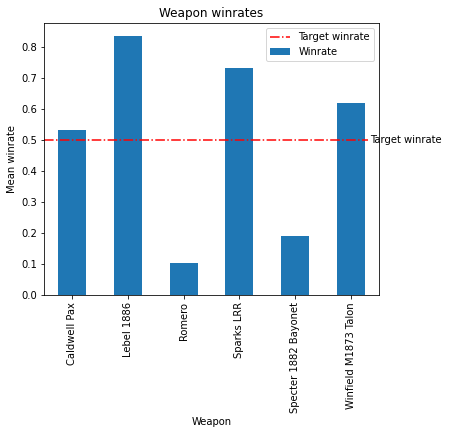

In [6]:
plot_data = df_plot_data.drop(["Wins", "Games"], axis=1)
plot_data.plot(kind='bar', title='Weapon winrates', ylabel='Mean winrate', xlabel='Weapon', figsize=(6, 5))
plt.hlines(0.5, -0.5, 5.3, color='red', label="Target winrate", linestyle="-.")
plt.text(5.35, 0.5, 'Target winrate ', ha='left', va='center')
plt.legend().get_texts()[1].set_text('Winrate')
plot_data

Caldwell Pax jest na ten moment poprawnie zbalansowany - jest około 50%. Należy nieco pogorszyć Lebel'a, Sparks'a i Winfield'a - są zbyt mocne. Polepszenia wymagają Romero i Specter, więc strzelby bliskiego zasięgu.

In [22]:
df_game_data.loc[:, "1"] = 1
df_cross_winrates = df_game_data.groupby(["Weapon0", "Weapon1"]).count()

weapons = ["Caldwell Pax", "Lebel 1886", "Romero", "Sparks LRR",
           "Specter 1882 Bayonet", "Winfield M1873 Talon"]
df_winrate_matrix = pd.DataFrame(columns = weapons, index = weapons)
for weapon1 in weapons:
    for weapon2 in weapons:
        if weapon1 != weapon2:
            wins_with_w1 = df_cross_winrates.loc[(weapon1, weapon2), "1"]
            wins_with_w2 = df_cross_winrates.loc[(weapon2, weapon1), "1"]
            df_winrate_matrix.at[weapon1, weapon2] = wins_with_w1/(wins_with_w1+wins_with_w2)
        else:
            df_winrate_matrix.at[weapon1, weapon2] = 0.5

df_winrate_matrix = df_winrate_matrix.astype("float")
df_winrate_matrix

,Caldwell Pax,Lebel 1886,Romero,Sparks LRR,Specter 1882 Bayonet,Winfield M1873 Talon
Caldwell Pax,0.500000,0.198171,0.914157,0.287390,0.889051,0.368116
Lebel 1886,0.801829,0.500000,0.981022,0.615708,0.980583,0.799705
Romero,0.085843,0.018978,0.500000,0.053942,0.308943,0.025758
Sparks LRR,0.712610,0.384292,0.946058,0.500000,0.925978,0.685801
Specter 1882 Bayonet,0.110949,0.019417,0.691057,0.074022,0.500000,0.029957
Winfield M1873 Talon,0.631884,0.200295,0.974242,0.314199,0.970043,0.500000


<AxesSubplot:>

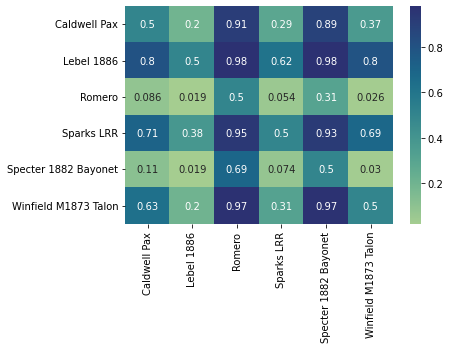

In [56]:
sns.heatmap(data = df_winrate_matrix, cmap=sns.color_palette("crest", as_cmap=True), annot=True)